In [1]:
from main_util import *
from skimage import filters

In [ ]:
def analyze_period(data_dir, fm=None):

        
    df_stat = pd.DataFrame(columns=['date', 'plot_num', 'start index', 'end index', 
                                'start time', 'end time', 'feces volume', 'urine volume'])

    writer = pd.ExcelWriter(data_dir+'.xlsx', engine='xlsxwriter')
    for date in os.listdir(data_dir):
        if date.startswith('.'): continue
        if data_dir == 'period_2' and fm:
            if int(date) > 20210319:
                fm = 2
            else:
                fm = 5
        print(date)
        df, start_indexes, end_indexes = analyze_one_day(data_dir, date, flowmeter = fm, door = False)
        plot_num = 0
        for s, e in zip(start_indexes, end_indexes):
            fig = plot_event(df, s, e, flowmeter = fm, derivative=None)
            fig.savefig(os.path.join(data_dir, date, 'event_' + str(plot_num+1) + '.png'))
#             if e - s < 30:
#                 fig.savefig(os.path.join('short', data_dir, 
#                                          str(e-s) + '_' + date + '_event_' + str(plot_num+1) + '.png'))
#             if e - s > 300:
#                 fig.savefig(os.path.join('long', data_dir, 
#                                          str(e-s) + '_' + date + '_event_' + str(plot_num+1) + '.png'))       
            plt.close()

#             fig_d_1 = plot_event(df, s, e, flowmeter = fm, derivative=1)
#             fig_d_1.savefig(os.path.join(data_dir, date, 'event_' + str(plot_num+1) + '_d1.png'))
#             plt.close()
#             fig_d_2 = plot_event(df, s, e, flowmeter = fm, derivative=2)
#             fig_d_2.savefig(os.path.join(data_dir, date, 'event_' + str(plot_num+1) + '_d2.png'))
#             plt.close()
            row = {'date': date,  'plot_num': plot_num, 'start index': s, 'end index': e,
                   'start time': df.loc[s, 'date_time'] , 'end time': df.loc[e, 'date_time'],
                   'feces volume': df.loc[e, 'feces'] - df.loc[s, 'feces'],
                   'urine volume': df.loc[e, 'urine'] - df.loc[s, 'urine']}
#             if (row['feces volume'] + row['urine volume']) < 0.2:
#                 continue
            df_stat = df_stat.append(row, ignore_index=True, sort=False)
            plot_num += 1
    df_stat.to_excel(writer, sheet_name=date)
    writer.save()

In [ ]:
# duration_simu = analyze_period('data_simulation', None)

In [ ]:
# df, start_indexes, end_indexes = analyze_one_day('period_1', '20200930', flowmeter = None, door = False)

In [ ]:
# duration_1 = analyze_period('period_1', None)

In [ ]:
# duration_2 = analyze_period('period_2', 2)

In [ ]:
# duration_3 = analyze_period('data_3', 2)

In [2]:
def read_stat(data_dir):
    df = pd.ExcelFile(data_dir+'.xlsx') # read feces file
    df_dates_list = []
    for sheet_name in df.sheet_names:
        df_data = df.parse(sheet_name, skiprows=0) 
        df_dates_list.append(df_data)
    df_dates = pd.concat(df_dates_list, axis=0)
    df_dates['volume'] = df_dates.loc[:, 'feces volume'] + df_dates.loc[:, 'urine volume']
    df_dates['duration'] = df_dates.loc[:, 'end index'] - df_dates.loc[:, 'start index']
    df_dates = df_dates.loc[df_dates.loc[:, 'volume'] >= 0.2, :]
    df_dates = df_dates.loc[df_dates.loc[:, 'duration'] >= 15, :]
    df_dates = df_dates.loc[df_dates.loc[:, 'duration'] <= 450, :]
    return df_dates

In [3]:
df_1 = read_stat('period_1')
duration_1 = (df_1.loc[:, 'end index'] - df_1.loc[:, 'start index']).values

In [ ]:
# t_1, duration_1_short = my_plot_hist(duration_1, cut=True)
# print(len([i for i in duration_1_short if i <= t_1]))
# print(len([i for i in duration_1_short if i > t_1]))

In [ ]:
# from skimage.filters.thresholding import _cross_entropy
# duration_1 = np.array(duration_1)
# thresholds = np.arange(np.min(duration_1_short) + 1.5, np.max(duration_1_short) - 1.5)
# entropies = [_cross_entropy(duration_1_short, t) for t in thresholds]
# iter_entropies = [_cross_entropy(duration_1_short, t) for t in iter_thresholds]

# print('Only', len(iter_thresholds), 'thresholds examined.')

# fig, ax = plt.subplots()

# ax.plot(thresholds, entropies, label='all threshold entropies')
# ax.plot(iter_thresholds, iter_entropies, label='optimization path')
# ax.scatter(iter_thresholds, iter_entropies, c='C1')
# ax.legend(loc='upper right')

# plt.show()

In [4]:
df_2 = read_stat('period_2')
duration_2 = (df_2.loc[:, 'end index'] - df_2.loc[:, 'start index']).values

In [ ]:
# t_2, duration_short_2 = my_plot_hist(duration_2, cut=True)
# print(len([i for i in duration_short_2 if i <= t_2]))
# print(len([i for i in duration_short_2 if i > t_2]))

In [5]:
df_3 = read_stat('data_3')
duration_3 = (df_3.loc[:, 'end index'] - df_3.loc[:, 'start index']).values

In [ ]:
# t_3, duration_short_3 = my_plot_hist(duration_3, cut=True)
# print('<t: ', len([i for i in duration_short_3 if i <= t_3]))
# print('>t: ', len([i for i in duration_short_3 if i > t_3]))

In [ ]:
# t_12, duration_short_12 = my_plot_hist(list(duration_1)+ list(duration_2), cut=True)
# print('<t: ', len([i for i in duration_short_12 if i <= t_12]))
# print('>t: ', len([i for i in duration_short_12 if i > t_12]))

In [ ]:
# t_13, duration_short_13 = my_plot_hist(list(duration_1)+ list(duration_3), cut=True)
# print('<t: ', len([i for i in duration_short_13 if i <= t_13]))
# print('>t: ', len([i for i in duration_short_13 if i > t_13]))

In [ ]:
# t_23, duration_short_23 = my_plot_hist(list(duration_2)+ list(duration_3), cut=True)
# print('<t: ', len([i for i in duration_short_23 if i <= t_23]))
# print('>t: ', len([i for i in duration_short_23 if i > t_23]))

In [ ]:
# def my_plot_hist(duration, cut=True, binning=1):
#     if cut:
#         duration_short = [x for x in duration if x >= 15]
#         duration_short = [x for x in duration_short if x <= 450]
#     else:
#         duration_short = duration        

#     t = filters.threshold_li(np.array(duration_short))
#     plt.figure()
#     n, bins, patches = plt.hist(duration_short, bins=range(15, 450 + 5, 5))
#     plt.xlabel('Duration (s)',  fontsize=14)
#     plt.ylabel('Count', fontsize=14)
#     plt.xticks(fontsize=14)
#     plt.show()
#     return t, duration_short

In [ ]:
t_123, duration_short_123 = my_plot_hist(list(duration_1)+ list(duration_2) + list(duration_3), cut=True)

print('<t: ', len([i for i in duration_short_123 if i <= t_123]))
print('>t: ', len([i for i in duration_short_123 if i > t_123]))

In [6]:
duration_short_123 = list(duration_1)+ list(duration_2) + list(duration_3)

In [ ]:
# duration_short_123 = [x // 5 * 5 for x in duration_short_123]

In [12]:
from sklearn import mixture
duration_short_123 = np.array(duration_short_123).reshape(-1, 1)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(duration_short_123)

In [13]:
means = gmm.means_.reshape(2, )
print('means', means)
#print(gmm.covariances_)
var = gmm.covariances_.reshape(2, )
stds = np.sqrt(var)
print('var', var)
print('stds', stds)
weights = gmm.weights_
print('weights', weights)


means [ 61.28402954 186.16216608]
var [ 922.17125431 7154.75346649]
stds [30.36727275 84.58577579]
weights [0.70890893 0.29109107]


In [14]:
y = gmm.predict(duration_short_123)

In [15]:
y_prob = gmm.predict_proba(duration_short_123)

In [16]:
from scipy.stats import norm

def gauss(x, mu, sigma, a):
#     y = np.exp(-(x-mu)**2/2/sigma**2)
    y = norm.pdf(x, mu, sigma)*a # 2nd gaussian

#     y = y/sum(y)
    return y

def bimodal(x, mu1, sigma1, mu2, sigma2):
    return gauss(x,mu1,sigma1)+gauss(x,mu2,sigma2)

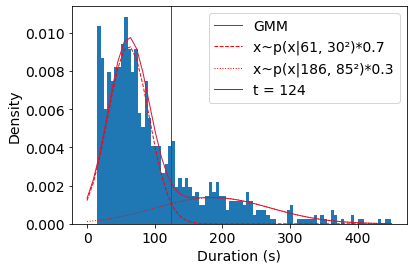

In [17]:
# Evaluate GMM
gmm_x = np.linspace(0,450)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))

# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(duration_short_123, bins=range(15, 450 + 5, 5), density=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=1, label="GMM")

# plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=3, label='model')
#...and individual Gauss curves
# print(means[0][0], stds[0][0], weights[0])
label_2 = 'x~p(x|{:.0f}, {:.0f}\u00b2)*{:.1f}'.format(means[1], stds[1], weights[1])
label_1 = 'x~p(x|{:.0f}, {:.0f}\u00b2)*{:.1f}'.format(means[0], stds[0], weights[0])
plt.plot(gmm_x, gauss(gmm_x, means[0], stds[0], weights[0]), color='red', lw=1, ls="--", label=label_1)
y
plt.plot(gmm_x, gauss(gmm_x, means[1], stds[1], weights[1]), color='red', lw=1, ls=":", label=label_2)

plt.axvline(x=124, ls='-', linewidth=1, color = 'red', label = 't = %d'%124)
ax.set_xlabel("Duration (s)", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [18]:
max(duration_short_123[y == 0])

array([124])

In [19]:
min(duration_short_123[y == 1])

array([125])

In [20]:
np.sum(y==0)

620

In [21]:
np.sum(y==1)

210

In [ ]:
210/830

In [31]:
y_1 = gmm.predict(np.array(duration_1).reshape(-1, 1))
print(np.sum(y_1==0), np.sum(y_1==1))

180 63


In [32]:
y_2 = gmm.predict(np.array(duration_2).reshape(-1, 1))
print(np.sum(y_2==0), np.sum(y_2==1))

321 101


In [33]:
y_3 = gmm.predict(np.array(duration_3).reshape(-1, 1))
print(np.sum(y_3==0), np.sum(y_3==1))

119 46
